# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import files
import warnings
warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
url = 'https://drive.google.com/uc?id=1mjyVb2e3pkHik7V3pYpIgt7urnGJqAH9'
df = pd.read_csv(url)
df.head()

,customer_id,signup_date,last_purchase_date,days_since_last_purchase,account_age_days,country,age,gender,device_type,favorite_category,total_orders,total_spent_usd,avg_order_value,is_premium_member,churned
0,CUST007563,1/1/2024,2/2/2024,699,32,United States,39,Female,Mobile,Groceries,4,286.08,71.52,0,1
1,CUST007904,1/1/2024,6/28/2024,552,179,France,26,Other,Mobile,Beauty,79,268.42,3.40,0,1
2,CUST005044,1/1/2024,4/29/2024,612,119,Japan,46,Female,Mobile,Fashion,1,60.28,60.28,0,1
3,CUST006602,1/1/2024,3/25/2025,282,449,Germany,34,Female,Tablet,Groceries,1,139.94,139.94,1,1
4,CUST004196,1/1/2024,6/28/2024,552,179,United States,36,Female,Mobile,Home & Garden,1,10.00,10.00,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  object 
 1   signup_date               10000 non-null  object 
 2   last_purchase_date        10000 non-null  object 
 3   days_since_last_purchase  10000 non-null  int64  
 4   account_age_days          10000 non-null  int64  
 5   country                   10000 non-null  object 
 6   age                       10000 non-null  int64  
 7   gender                    10000 non-null  object 
 8   device_type               10000 non-null  object 
 9   favorite_category         10000 non-null  object 
 10  total_orders              10000 non-null  int64  
 11  total_spent_usd           10000 non-null  float64
 12  avg_order_value           10000 non-null  float64
 13  is_premium_member         10000 non-null  int64  
 14  churned

In [5]:
df.describe()

,days_since_last_purchase,account_age_days,age,total_orders,total_spent_usd,avg_order_value,is_premium_member,churned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,118.835500,240.763900,33.885600,7.713700,312.222272,208.596229,0.143900,0.377100
std,169.226426,171.295808,9.465531,29.907347,530.249651,443.111121,0.351006,0.484685
min,1.000000,0.000000,18.000000,1.000000,10.000000,0.030000,0.000000,0.000000
25%,1.000000,97.000000,27.000000,1.000000,65.765000,26.087500,0.000000,0.000000
50%,1.000000,210.000000,34.000000,1.000000,151.000000,78.335000,0.000000,0.000000
75%,208.000000,362.000000,40.000000,3.000000,343.177500,211.305000,0.000000,1.000000
max,719.000000,725.000000,78.000000,300.000000,9564.940000,9564.940000,1.000000,1.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [7]:
df.isnull().sum()

,0
customer_id,0
signup_date,0
last_purchase_date,0
days_since_last_purchase,0
account_age_days,0
country,0
age,0
gender,0
device_type,0
favorite_category,0


In [8]:
df.duplicated().sum()

np.int64(0)

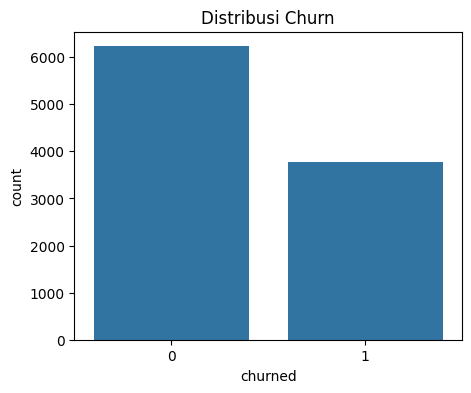

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="churned")
plt.title("Distribusi Churn")
plt.show()

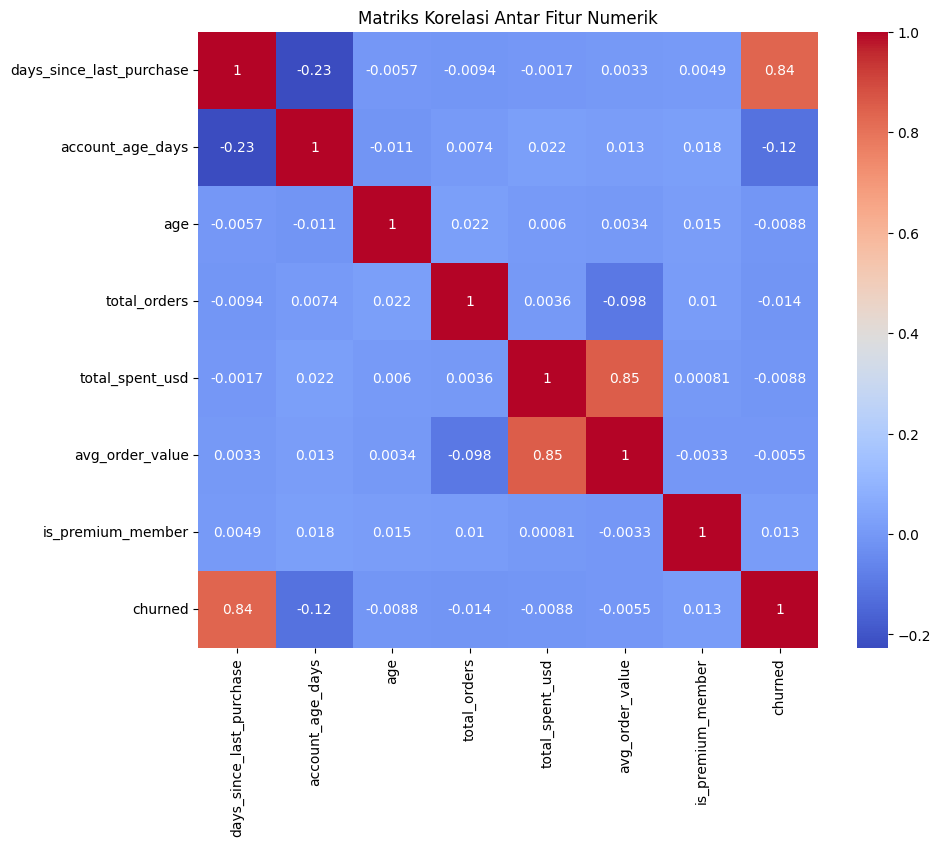

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matriks Korelasi Antar Fitur Numerik")
plt.show()

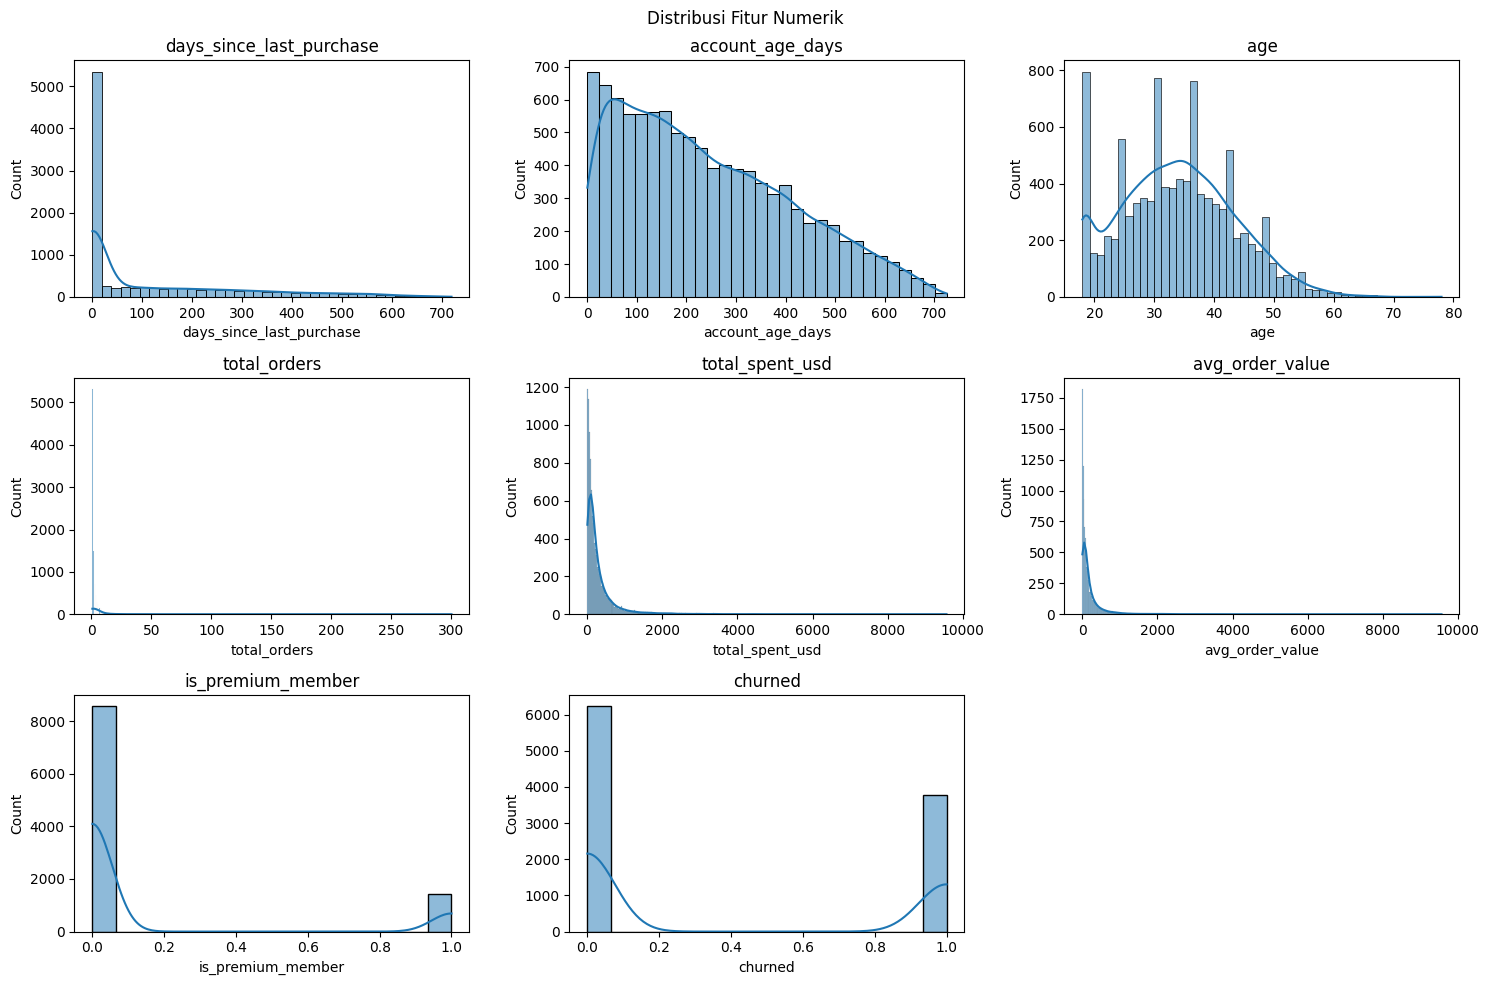

In [11]:
num_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.suptitle("Distribusi Fitur Numerik")
plt.tight_layout()
plt.show()

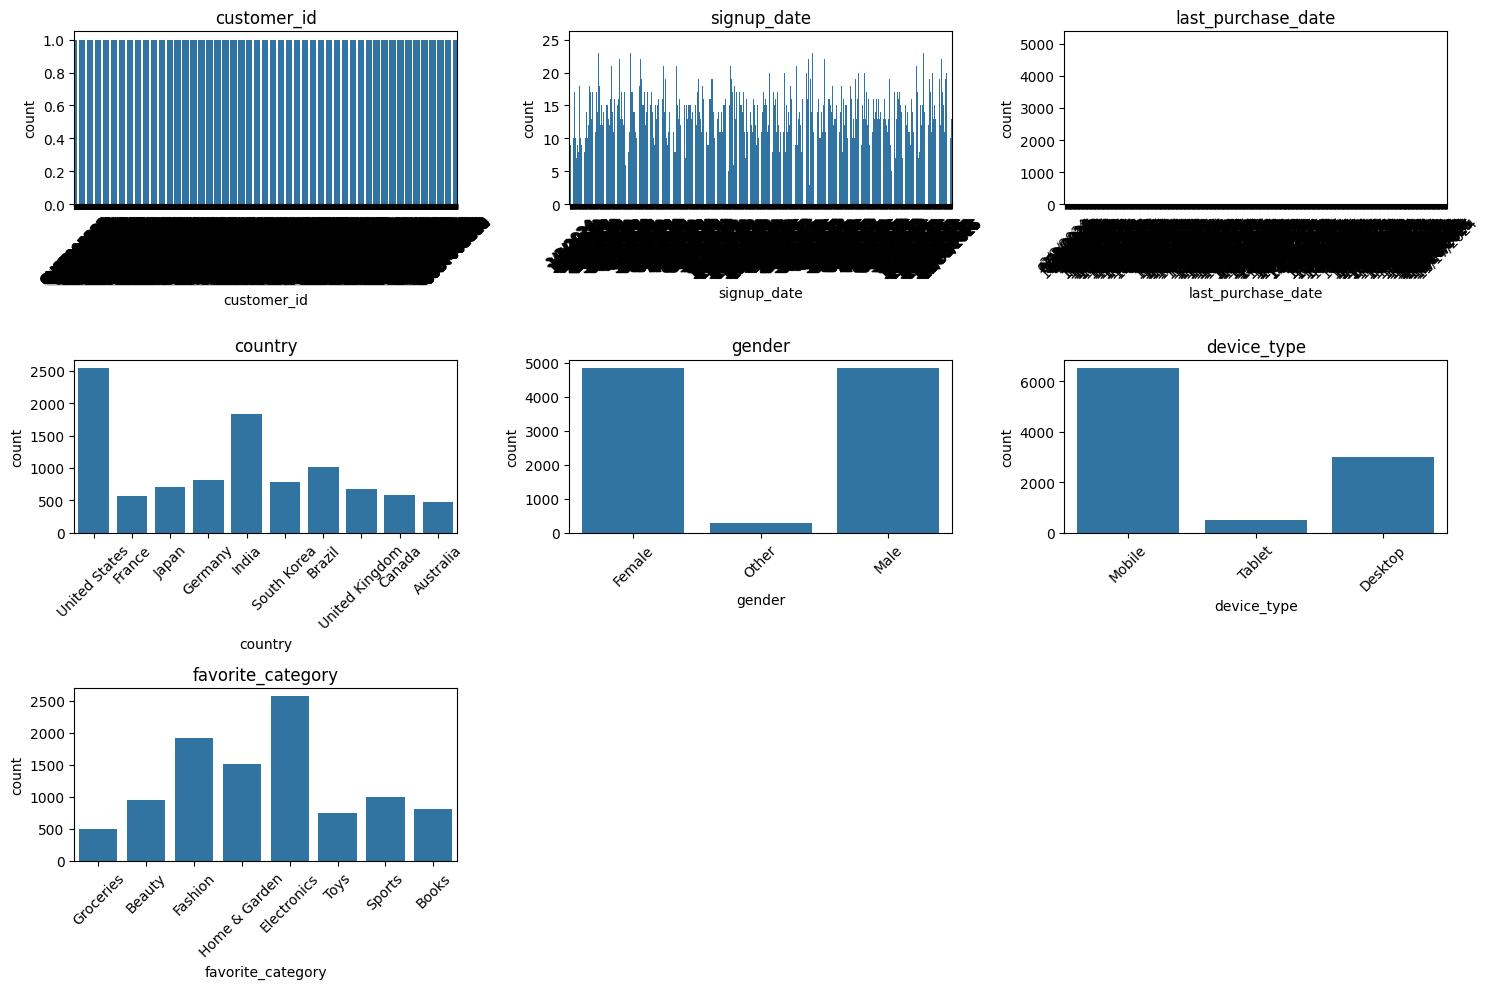

In [15]:
cat_cols = df.select_dtypes(include=["object"]).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [16]:
df = df.drop_duplicates()

In [17]:
df = df.fillna(method="ffill")

In [19]:
# Encoding kategorikal
df_encoded = df.copy()

label_encoders = {}

cat_cols = df_encoded.select_dtypes(include=['object']).columns

for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

df_encoded.head()

,customer_id,signup_date,last_purchase_date,days_since_last_purchase,account_age_days,country,age,gender,device_type,favorite_category,total_orders,total_spent_usd,avg_order_value,is_premium_member,churned
0,7562,0,238,699,32,9,39,0,1,4,4,286.08,71.52,0,1
1,7903,0,471,552,179,3,26,2,1,0,79,268.42,3.40,0,1
2,5043,0,356,612,119,6,46,0,1,3,1,60.28,60.28,0,1
3,6601,0,292,282,449,4,34,0,2,4,1,139.94,139.94,1,1
4,4195,0,471,552,179,9,36,0,1,5,1,10.00,10.00,1,1


In [29]:
# Scaling numerik
scaler = StandardScaler()

num_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('churned')

df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [30]:
# Split Data Train-Test DATA
X = df_encoded.drop(["churned", "customer_id"], axis=1)
y = df_encoded["churned"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((8000, 13), (2000, 13))

In [31]:
df_encoded.to_csv("dataset_preprocessing.csv", index=False)

files.download("dataset_preprocessing.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>